In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("cardata.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

## CHECKING CATEGORICAL VALUES

In [4]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [5]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

## CHECKING MISSING VALUES

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

## DROOPING CAR NAME ,IT IS NOT VALUBLE COLUMS FOR PREDICTION AND CREATE NEW COLUMN "TOTAL YEAR"

In [12]:
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
final_dataset['Current_Year']=2020

## SUBTRACTING YEAR FROM CURRENT YEAR TO GET TOTAL YEAR AND DROP THE "YEAR" AND "CURRENT YEAR" COLUMN

In [14]:
final_dataset['TotalYear']=final_dataset['Current_Year']-final_dataset['Year']

In [15]:
final_dataset.drop(['Year','Current_Year'],axis=1,inplace=True)

In [16]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,TotalYear
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [17]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,TotalYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [18]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,TotalYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
TotalYear,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<Figure size 1152x648 with 0 Axes>

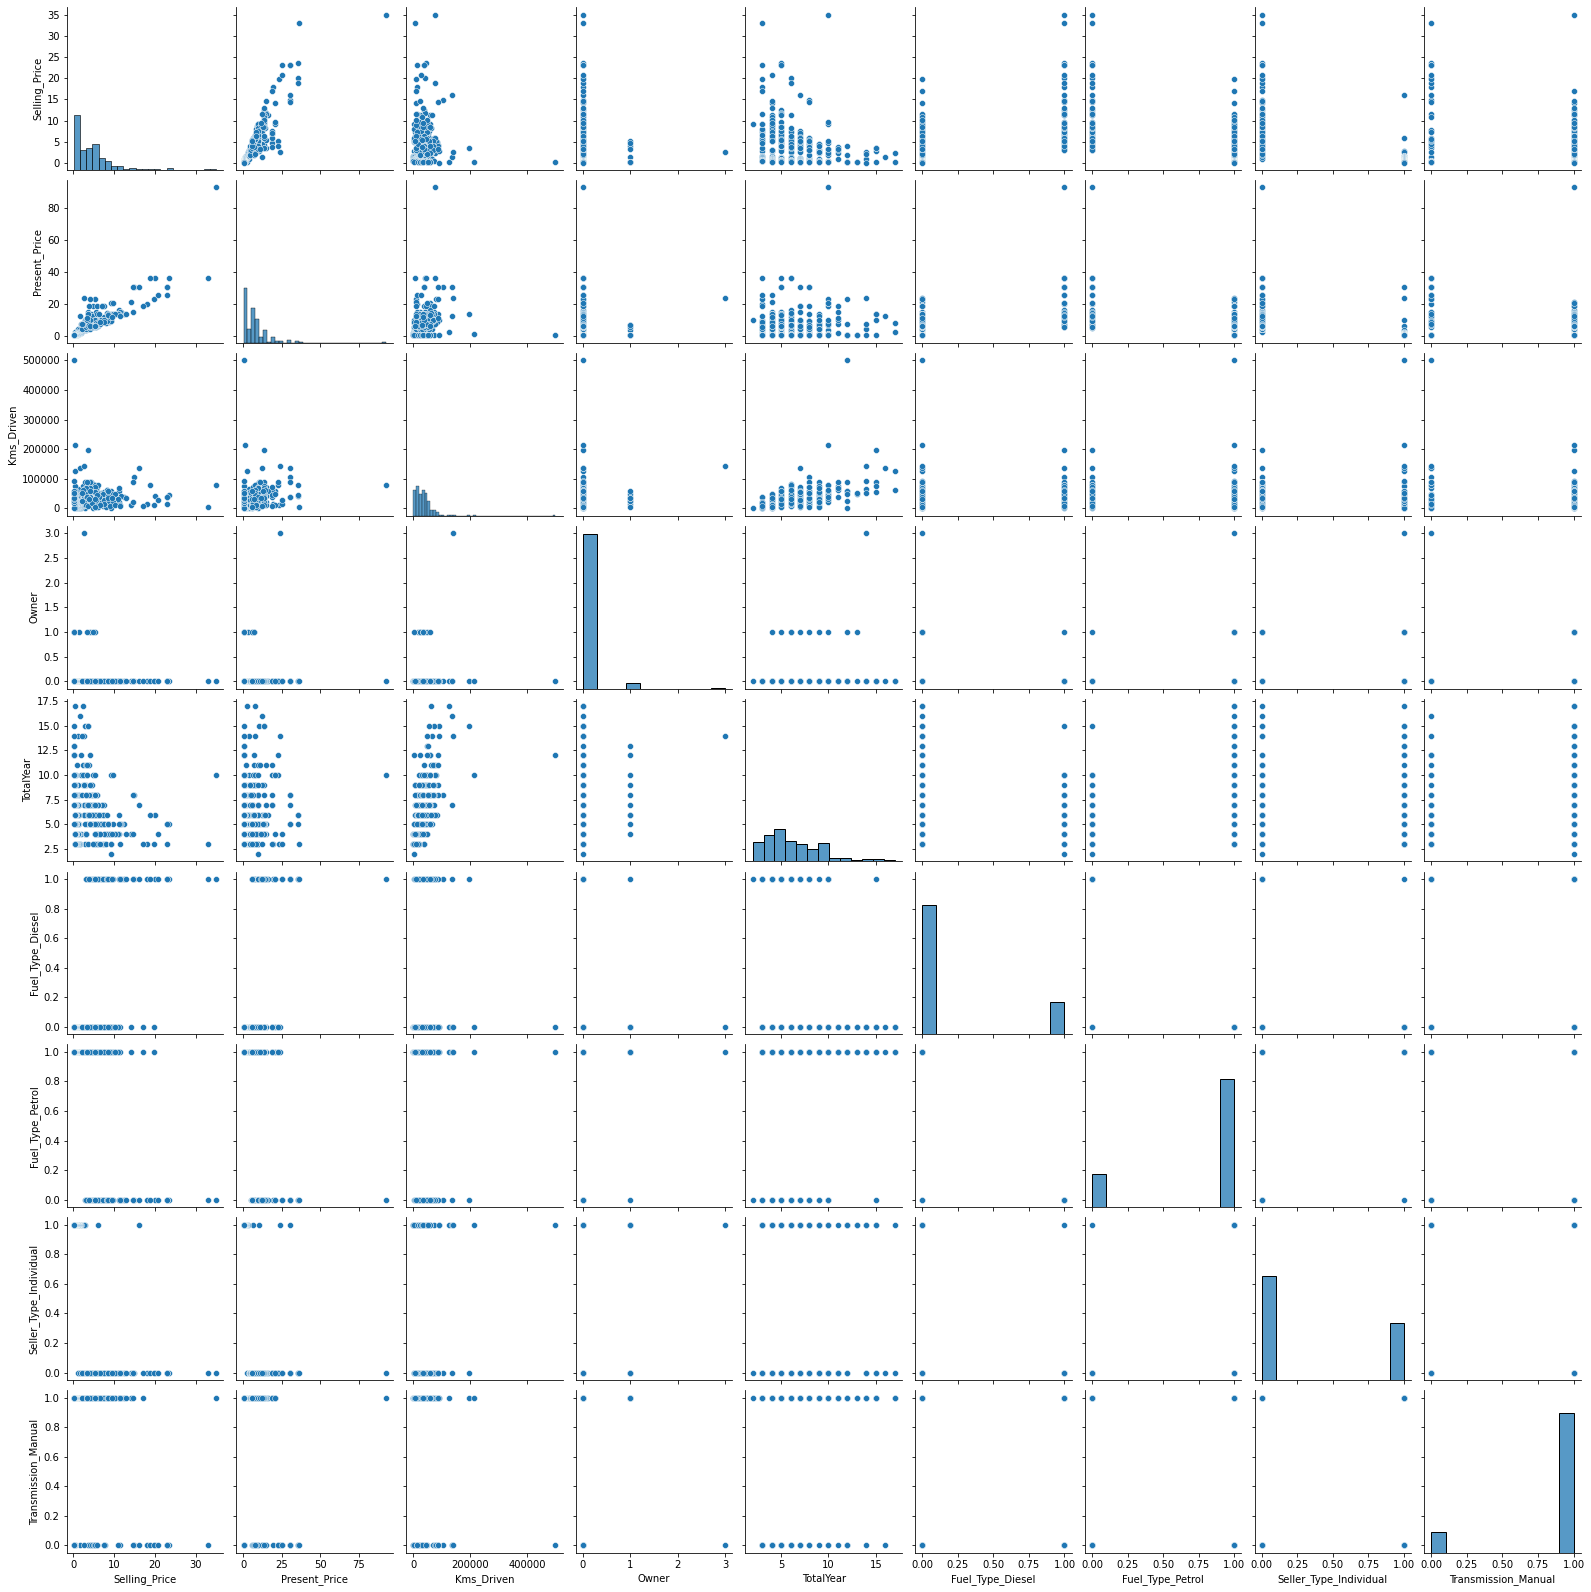

In [19]:

plt.figure(figsize=(16,9))
sns.pairplot(final_dataset)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

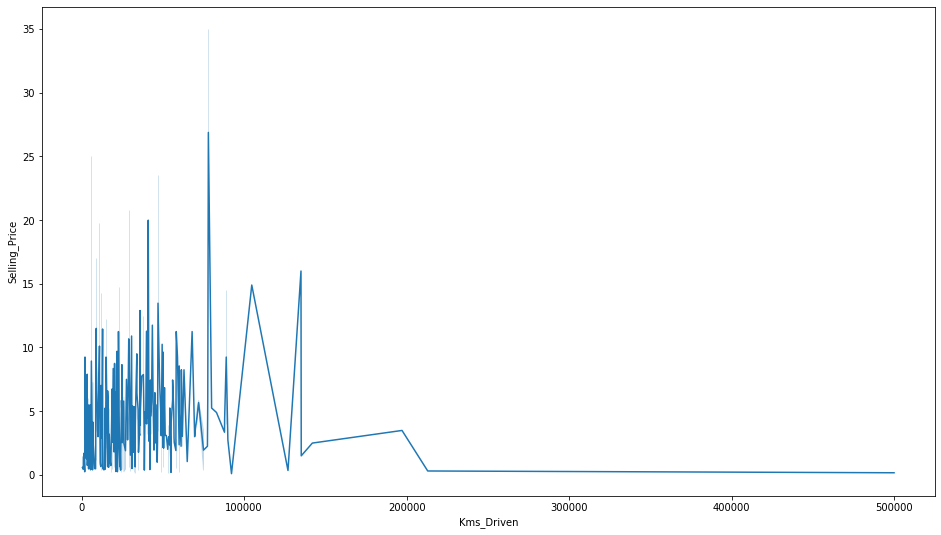

In [20]:
plt.figure(figsize=(16,9))
sns.lineplot(x="Kms_Driven",y="Selling_Price",data=final_dataset)

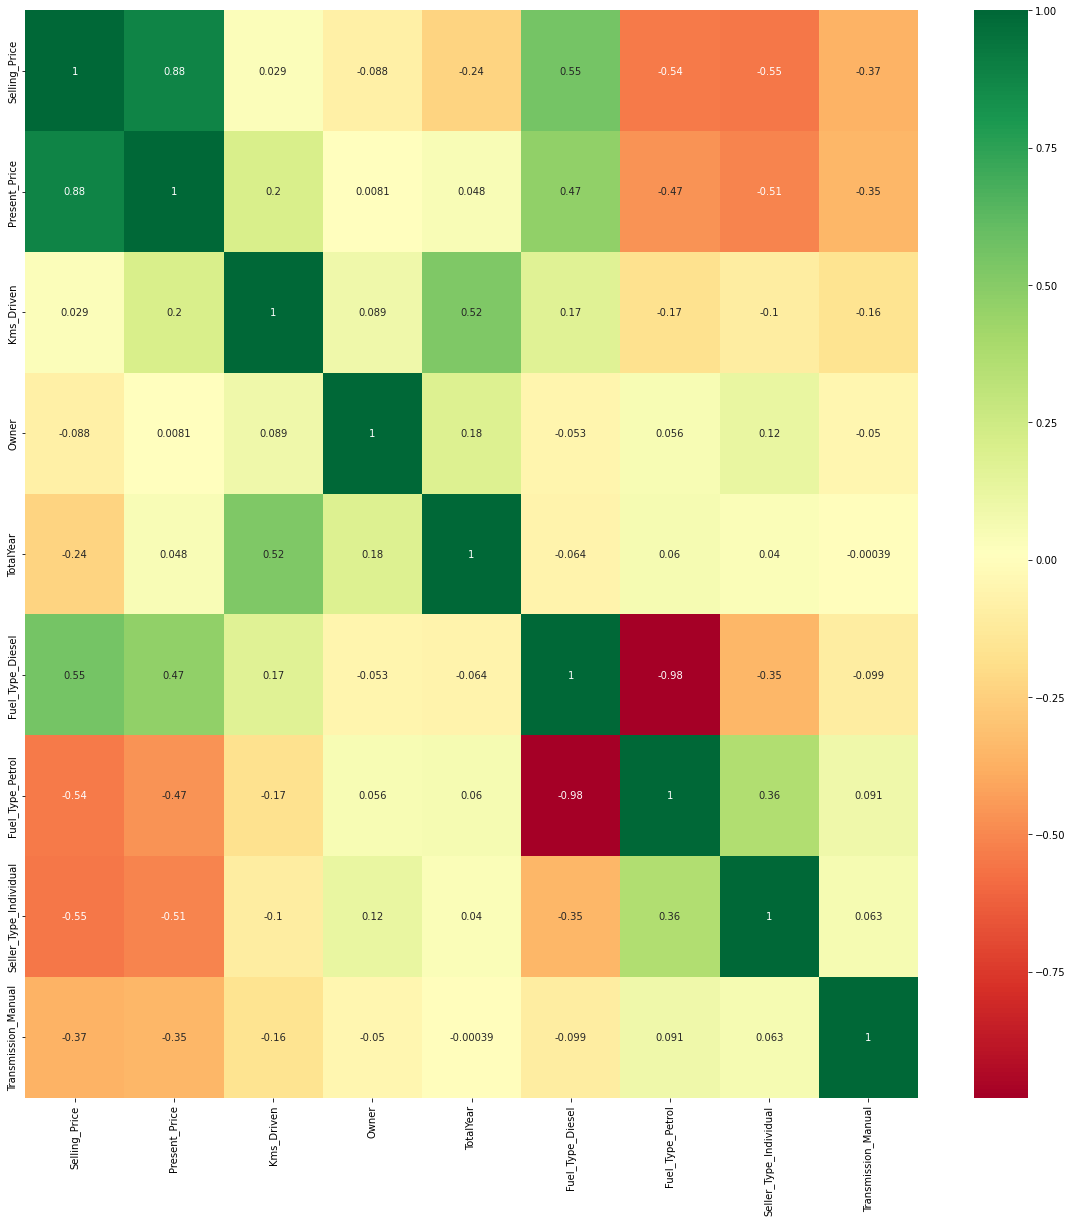

In [21]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
X=final_dataset.iloc[:,1:]
Y=final_dataset['Selling_Price']

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,TotalYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.37276424 0.04622279 0.00056333 0.0735092  0.22610961 0.01550319
 0.12794318 0.13738447]


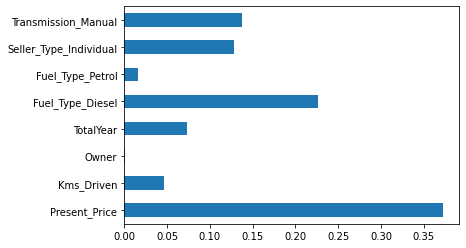

In [26]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [28]:
X_train

,Present_Price,Kms_Driven,Owner,TotalYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
140,1.20,32000,0,7,0,1,1,1
89,6.76,40000,0,6,0,1,0,1
141,0.80,20000,0,4,0,1,1,1
246,6.79,35000,0,8,0,1,0,1
114,1.47,17000,0,5,0,1,1,1
...,...,...,...,...,...,...,...,...
157,0.84,23000,0,5,0,1,1,1
283,11.80,9010,0,4,0,1,0,1
103,1.60,1200,0,3,0,1,1,1
105,2.37,21700,0,5,0,1,1,1


In [29]:
X_test

,Present_Price,Kms_Driven,Owner,TotalYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
250,13.60,35934,0,4,1,0,0,1
93,30.61,40000,0,5,1,0,0,0
91,16.09,58242,0,6,1,0,0,1
169,0.54,14000,0,5,0,1,1,1
284,5.90,9800,0,7,0,1,0,1
...,...,...,...,...,...,...,...,...
166,0.55,1000,0,4,0,1,1,1
164,0.54,14000,0,4,0,1,1,1
119,1.90,5400,0,7,0,1,1,1
12,9.94,15000,0,5,0,1,0,0


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [31]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
max_features=['auto','sqrt']

In [34]:
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
            }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
rf=RandomForestRegressor()

In [41]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [42]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
predictions=rf_random.predict(X_test)
predictions


array([10.55394898, 21.45601263,  7.08860718,  0.39834301,  4.53193955,
       12.82262269,  2.5271787 ,  0.33685311,  0.26845822,  2.83167345,
       10.03860416,  4.50898203,  5.51991115,  2.57620393,  5.73279141,
        7.04431998,  2.88957433,  4.58332883,  5.519056  ,  0.47509264,
        0.41122474,  0.39800092, 12.04393713,  0.88020657,  0.6360251 ,
        2.7810421 ,  2.60284504,  0.40550862,  1.1246202 ,  0.58335758,
        7.34628769,  7.89865169,  1.36413729,  0.20105672,  0.20232035,
        2.89385018,  5.39298551,  2.88275725,  4.12614566,  7.77346249,
        0.33498851,  0.6894343 ,  5.36762699,  0.20240483, 16.33067315,
        5.36384951,  3.94074693,  0.63793892,  2.91767703,  6.81838515,
        0.68830782,  6.52173859,  0.53713088,  1.01751948,  0.68830782,
        5.2735326 ,  0.40563443,  0.4057411 ,  1.26060351,  7.37069777,
        7.47650621])

C:\Users\Sarth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

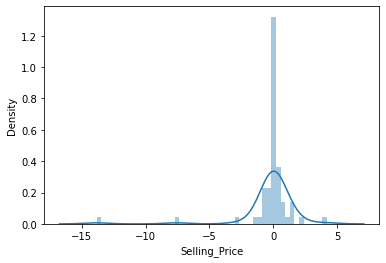

In [49]:
sns.distplot(Y_test-predictions)

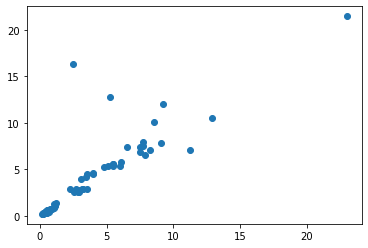

In [50]:
plt.scatter(Y_test,predictions)

In [51]:
import pickle
file=open('random_forest_refression.pkl','wb')
pickle.dump(rf_random,file)